In [1]:
# important imports.
import numpy as np
import matplotlib.pyplot as plt

# get the MNIST dataset from sklearn dataset. It's computationally easier if downloaded from sklearn.
# original dataset can be found at http://yann.lecun.com/exdb/mnist/
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
x, y = mnist['data'], mnist['target'] # (70,000 images of 28x28 features)

In [9]:
# splitting the dataset. using first 60,000 data for training and rest for test set.
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

# shuffle the training set to ensure consistent cross-validation folds.
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]
x_test[9300].shape

(784,)

In [4]:
# import MLPclassifier for scikit learn
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,), random_state=42)
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [5]:
clf.predict([x_test[9300]])

array([9.])

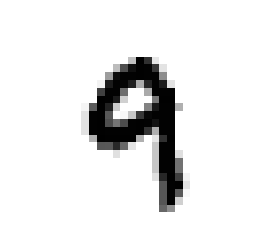

In [6]:
import matplotlib.pyplot as plt
import matplotlib

digit = x_test[9300]
arr = digit.reshape(28, 28)
plt.imshow(arr, cmap= matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [7]:
# let's evaluate MLPClassifier using cross-val_score using k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.88582284, 0.88304415, 0.90513577])